# Test Equation 1

$$
u' = -100 \cdot u + 10 \cdot \cos(t)
$$
$$
u(0) = 0
$$

In [57]:
from rk_methods import *
from imex_methods import *
from measure import*
from order_estimate import *

def g(t, u):
    return -100 * u

G = [[-100]]

def f(t, u):
    return 10 * np.cos(t)

def f_exact(t):
    return 1/10001 * (9001 * np.exp(-100 * t) + 10 * np.sin(t) + 1000 * np.cos(t))
    # return 1/10001 * ((-10*np.sin(0) - 1000*np.cos(0)) * np.exp(-100 * (t - 0)) + 10 * np.sin(t) + 1000 * np.cos(t))

Ns = list(range(50, 10001, 50))

Tl = 0
Tr = 5

# IMEX Euler

$$
    y_{n+1} = y_n + h ( f_1(t_n, y_n) + f_2(t_{n + 1}, y_{n+1}))
$$

In [58]:
A = [[1]]
b = [1]
c = [1]
A_ = [[0, 0], [1, 0]]
b_ = [1, 0]

table = create_mesasurement(f, g, A, A_, b, b_, c, Tl, Tr, f_exact, [0.2, 0.1, 0.05], G, Ns, verbose=False)

from IPython.display import HTML, display
display(HTML(table))

Name,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error
ERK,0.0462,0.00714,0.18344,0.03365,0.00455,0.09483,0.13703,0.00263,0.04881
IRK,0.01799,0.1,0.08173,0.15623,0.00833,0.09977,0.32103,0.00333,0.0486
IMEX,0.00636,0.1,0.08219,0.08951,0.00833,0.09977,0.16215,0.00333,0.0486
IMEX Lin,0.00364,0.1,0.08219,0.04589,0.00833,0.09977,0.09673,0.00333,0.0486
IMEX LU,0.00532,0.1,0.08219,0.14461,0.00833,0.09977,0.54798,0.00333,0.0486


In [59]:
IMEX_E_order_result = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(f, LinearImplicitSolver(G), y0, A, A_, b, b_, c, Tl, Tr, N), f_exact(0), Tl, Tr, [2**11, 2**12, 2**13], 2**16)
print('Estimating order from fine grid:')
print(f'Order result: {IMEX_E_order_result}')

Estimating order from fine grid:
Order result: [0.98008353 1.06337196]


# IMEX trapezoid

$$
y_{n+1} = y_n + \tfrac{h}{2} (f(t_n, y_n) + f_1(t_{n+1}, y_n + h \cdot f(t_n, y_n)) + f_2(t_{n+1}, y_{n+1}))
$$

In [60]:
from imex_methods import *

h, t, y = IMEX_trapezoid(f, g, f_exact(0), Tl, Tr, 8000)

error = np.linalg.norm(y - f_exact(t), np.inf)

IMEX_trapezoid_order_result = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX_trapezoid(f, g, y0, Tl, Tr, N), f_exact(0), Tl, Tr, [2**11, 2**12, 2**13], 2**15)
print('Estimating order from fine grid:')
print(f'Order result: {IMEX_trapezoid_order_result}')

Estimating order from fine grid:
Order result: [2.02417039 2.07215471]


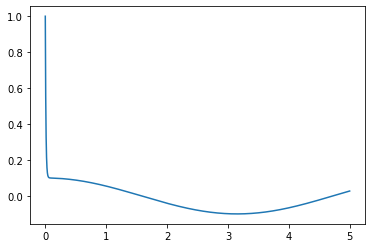

In [61]:
import matplotlib.pyplot as plt

plt.plot(t, y)

# IMEX midpoint

In [62]:
A = [[1/2]]
b = [1]
c = [1/2]
A_ = [[0, 0], [1/2, 0]]
b_ = [0, 1]

table = create_mesasurement(f, g, A, A_, b, b_, c, Tl, Tr, f_exact, [0.2, 0.1, 0.05, 0.025], G, Ns, verbose=False)

from IPython.display import HTML, display
display(HTML(table))

/home/peti/elte/msc/num_mod_project/proj/imex-runge-kutta-methods/imex_methods.py:16: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  return fsolve(f_impl, base)


Name,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error
ERK,0.01342,0.01111,0.15928,0.01457,0.00909,0.09112,0.01539,0.00714,0.04755,0.01799,0.00526,0.02318
IRK,0.0358,0.025,0.17387,0.05094,0.01667,0.08817,0.07061,0.01111,0.03913,0.08691,0.00833,0.02055
IMEX,0.02449,0.025,0.17388,0.03661,0.01667,0.08817,0.03889,0.01111,0.03913,0.06095,0.00833,0.02055
IMEX Lin,0.01427,0.025,0.17388,0.02448,0.01667,0.08817,0.02402,0.01111,0.03913,0.03302,0.00833,0.02055
IMEX LU,0.01778,0.025,0.17388,0.04056,0.01667,0.08817,0.0347,0.01111,0.03913,0.06379,0.00833,0.02055


In [63]:
IMEX_midpoint_order_result = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(f, LinearImplicitSolver(G), y0, A, A_, b, b_, c, Tl, Tr, N), f_exact(0), Tl, Tr, [2**11, 2**12, 2**13], 2**15)
print('Estimating order from fine grid:')
print(f'Order result: {IMEX_trapezoid_order_result}')

Estimating order from fine grid:
Order result: [2.02417039 2.07215471]


# IMEX3

In [64]:
gamma = (3 + np.sqrt(3)) / 6

A = [[gamma, 0], [1 - 2 * gamma, gamma]]
b = [1/2, 1/2]
c = [gamma, 1 - gamma]
A_ = [[0, 0, 0], [gamma, 0, 0], [gamma - 1, 2*(1 - gamma), 0]]
b_ = [0, 1/2, 1/2]

table = create_mesasurement(f, g, A, A_, b, b_, c, Tl, Tr, f_exact, [0.2, 0.1, 0.05, 0.025], G, Ns, verbose=False)

from IPython.display import HTML, display
display(HTML(table))

Name,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error
ERK,0.01223,0.01429,0.12035,0.01286,0.0125,0.0727,0.01732,0.01111,0.04648,0.01858,0.00909,0.02158
IRK,0.05643,0.03333,0.178,0.05938,0.02,0.07664,0.09769,0.01429,0.03748,0.17204,0.01111,0.02034
IMEX,0.03141,0.03333,0.17801,0.03608,0.02,0.07664,0.05841,0.01429,0.03748,0.08007,0.01111,0.02034
IMEX Lin,0.01422,0.03333,0.17801,0.01957,0.02,0.07664,0.03428,0.01429,0.03748,0.0453,0.01111,0.02034
IMEX LU,0.02749,0.03333,0.17801,0.0586,0.02,0.07664,0.09495,0.01429,0.03748,0.06775,0.01111,0.02034


In [65]:
IMEX_3_order_result = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(f, LinearImplicitSolver(G), y0, A, A_, b, b_, c, Tl, Tr, N), f_exact(0), 0, 20, [2**14, 2**15, 2**16], 2**18)
print('Estimating order from fine grid:')
print(f'Order result: {IMEX_3_order_result}')

Estimating order from fine grid:
Order result: [2.91601542 2.97432791]


# Test equation 2

In [66]:
from rk_methods import *
from imex_methods import *
from measure import*
from order_estimate import *

def g(t, u):
    return -1000 * u

G = [[-1000]]

def f(t, u):
    return 10 * np.cos(t)

def f_exact(t):
    return 1/10001 * ((-10*np.sin(0) - 1000*np.cos(0)) * np.exp(-100 * (t - 0)) + 10 * np.sin(t) + 1000 * np.cos(t))

Ns = list([500, 10000])

Tl = 0
Tr = 5

In [69]:
gamma = (3 + np.sqrt(3)) / 6

A = [[gamma, 0], [1 - 2 * gamma, gamma]]
b = [1/2, 1/2]
c = [gamma, 1 - gamma]
A_ = [[0, 0, 0], [gamma, 0, 0], [gamma - 1, 2*(1 - gamma), 0]]
b_ = [0, 1/2, 1/2]

table = create_mesasurement(f, g, A, A_, b, b_, c, Tl, Tr, f_exact, [0.1], G, Ns, verbose=False)

from IPython.display import HTML, display
display(HTML(table))

/tmp/ipykernel_28471/2855735232.py:7: RuntimeWarning: overflow encountered in multiply
  return -1000 * u


Name,Exec time (s),Step Size,Error
ERK,0.32271,0.0005,0.09
IRK,0.12015,0.01,0.09
IMEX,0.14048,0.01,0.09
IMEX Lin,0.04793,0.01,0.09
IMEX LU,0.07975,0.01,0.09
